
                                CSE 676 - DEEP LEARNING - FINAL PROJECT

                        Solving Sudoku Using Image Recognition & Deep Learning

                                    > TEAM MEMBERS
                                    >> - Prajvala Rajendra Sonawane
                                    >> - Mrunmayee Rane 
                                    >> - Nikita Satyajit Desai



In [ ]:
# Git repository link : 
# !git clone "https://github.com/desainikita/Solving-Sudoku-Using-DL.git"

In [ ]:

# import os
# os.chdir("/content/Solving-Sudoku-Using-DL")

1. Installing the required libraries

In [ ]:

# !pip install numpy
# !pip install tensorflow
# !pip install keras
# !pip install pillow

2. Importing the required python libraries

In [4]:
import numpy as np
import cv2 as cv
import glob
import os
import re
import pickle
import keras
import copy
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
# Keras datasets and model layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras import backend as K
from keras.utils import np_utils
from google.colab.patches import cv2_imshow
# keras optimizers and sklearn utiity
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
from load_data import *
from model import *
from load_data import *
from utility.pickle import *
from utility.plot import *
from process_image import *
from sudoku import *

3. Setting the hyperparameters

In [6]:

batch_size = 128
epochs = 500
no_of_classes = 10
input_shape = (32, 32, 1)
activation_functions = ["relu", "softmax"]
learning_rate = 0.001
epsilon = 1e-08
epsilon_decay = 0.0
loss_type = "categorical_crossentropy"
digitclassifier_model_filename = "cfk-digit-recognition-500epochs.h5"
sudoku_shape = (9,9,1)

4. Loading the Chars74k dataset saved in dataset folder
> Reference link =>  http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/





In [7]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset preparation at ./dataset/Digits needs to be done. More information provided in Readme.md

In [8]:
dataset_root_folder = "./dataset/Digits"
X = [] # Loading data for training and testing
Y = [] # Loading output true values - ground truth for calculating loss

In [9]:
X, Y = load_data(no_of_classes=no_of_classes, dataset_root_folder= dataset_root_folder)

Dataset Loaded !


In [10]:
print(f"Length of the loaded dataset : {len(X)}")

Length of the loaded dataset : 885


In [12]:
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print(f"Training data shape : {train_X.shape}")
print(f"Validation data Shape : {valid_X.shape}")
print(f"Test data shape : {test_X.shape}")

Training data shape : (672, 32, 32, 3)
Validation data Shape : (168, 32, 32, 3)
Test data shape : (45, 32, 32, 3)


5. Preprocess the dataset

In [13]:
data_dict = {
    "train": train_X,
    "validation" : valid_X,
    "test" : test_X
}

x_train, x_valid , x_test = preprocess(data_dict)


Hello
(672, 32, 32, 3)
(672, 32, 32, 3)


In [15]:
y_train = to_categorical(train_y, no_of_classes)
y_valid = to_categorical(valid_y, no_of_classes)
y_test = to_categorical(test_y, no_of_classes)

6. Get the deep learning model defined for image recognition

In [16]:
# Load model for digit image recognition

model_digit_identifier = get_imageRecognition_model(input_shape= input_shape, activation_functions= activation_functions,padding = "same", output_shape= no_of_classes)

model_optimizer = tf.keras.optimizers.RMSprop(
    learning_rate= learning_rate,
    rho=0.9,
    # momentum=0,
    epsilon = epsilon,
    decay = epsilon_decay,
    centered=False,
    name="RMSprop"
    # **kwargs
)
model_digit_identifier.compile(optimizer = model_optimizer,loss= loss_type ,metrics=['accuracy'])

7. Train the model on the dataset

In [18]:
# Train the model
history = model_digit_identifier.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid, y_valid))
print("Training the digit classifier model is completed successfully")


Epoch 1/500
6/6 [==============================] - 13s 117ms/step - loss: 2.3043 - accuracy: 0.1443 - val_loss: 2.2733 - val_accuracy: 0.2202
Epoch 2/500
6/6 [==============================] - 0s 24ms/step - loss: 2.2620 - accuracy: 0.1771 - val_loss: 2.2822 - val_accuracy: 0.0774
Epoch 3/500
6/6 [==============================] - 0s 24ms/step - loss: 2.2392 - accuracy: 0.1622 - val_loss: 2.2098 - val_accuracy: 0.2440
Epoch 4/500
6/6 [==============================] - 0s 25ms/step - loss: 2.1371 - accuracy: 0.2366 - val_loss: 2.0185 - val_accuracy: 0.2738
Epoch 5/500
6/6 [==============================] - 0s 25ms/step - loss: 1.8274 - accuracy: 0.4062 - val_loss: 3.6005 - val_accuracy: 0.1845
Epoch 6/500
6/6 [==============================] - 0s 24ms/step - loss: 1.9961 - accuracy: 0.4435 - val_loss: 1.5214 - val_accuracy: 0.5893
Epoch 7/500
6/6 [==============================] - 0s 25ms/step - loss: 1.3420 - accuracy: 0.5744 - val_loss: 1.6831 - val_accuracy: 0.5060
Epoch 8/500
6/6 [=

In [22]:

# Save the trained model in digitclassifier_model_filename

model_digit_identifier.save("./models/"+digitclassifier_model_filename)
print(f"Saved the digit recognition model as {digitclassifier_model_filename}")

# Save the history metrics as well if needed for analysis later


Saved the digit recognition model as cfk-digit-recognition-500epochs.h5


In [24]:
# Pickle - store the model metrics for use later
save_metrics(history = history, pickle_file_name="train_history_500epochs.pckl",path_to_save= "./pickled_files")
print(f"Saved model history at /pickled_files/train_history_500epochs.pckl")

Saved model history at /pickled_files/train_history_500epochs.pckl


In [26]:
# Reload the model metrics for plotting training loss and accuracy
loaded_history = load_metrics("./pickled_files/train_history_500epochs.pckl")

In [27]:
loaded_history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

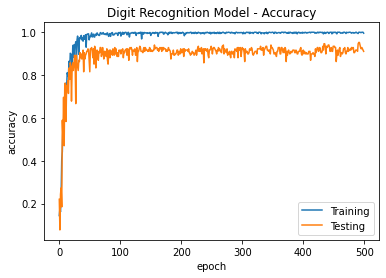

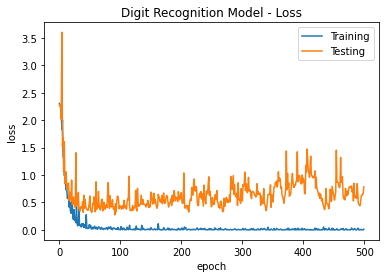

In [28]:
# Plot the metrics
plot(loaded_history)

In [29]:
# Loading the saved model
model_digit_identifier = keras.models.load_model("./models/"+digitclassifier_model_filename)

In [30]:
# Testing the pre-trained model on test data
testing_results = model_digit_identifier.evaluate(x_test, y_test, verbose=0)
print('Testing loss:', testing_results[0] , "Test accuracy:", testing_results[1])


Testing loss: 1.152884840965271 Test accuracy: 0.9555555582046509


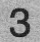

prediction shape: (10,)
Predicted value of digit :  3  Prediction :  1.0


In [31]:
# Sample testing on a single digit image

# model1 = keras.models.load_model('/content/mnist-200epochs.h5')
# model1 = keras.models.load_model('/content/mnist-analytics-cfk-2.h5')
model1 = model_digit_identifier
file = "./dataset/51.jpg"

image3 = cv.imread(file, cv.IMREAD_GRAYSCALE)
cv2_imshow(image3)
if (image3 is not None and image3.size == 0):
     print("Error reading file")
    #  return -1
image3 = cv.resize(image3, (32, 32))
image3 = image3.astype('float32')
image3 = image3.reshape(1, 32, 32, 1)
image3 = 255-image3
image3 /= 255

# actual3 = np.array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
test3 = np.array(image3)

prediction3 = model1.predict(test3[:1])[0]
print("prediction shape:", prediction3.shape)

print("Predicted value of digit : ", np.argmax(prediction3)," Prediction : ", max(prediction3))

Part 2 - Loading image and preprocessing

1. Take image input of entire Sudoku puzzle and applying transformations - preprocess, normalizing, contouring, warping, splitting into individual cells and croppping

In [67]:

def take_image_input(input_image):
    img = cv.resize(input_image, (450,450))

    threshold_image = preprocess_image(img)
    plt.figure()
    plt.title('Processed image after thresholding')
    plt.imshow(threshold_image)
    plt.show()


    plt.figure()
    plt.title('Processed image after contouring')
    contour_fig1, contour_fig2 ,contour, hierarchy = contouring(img, threshold_image)
    plt.imshow(contour_fig1)
    plt.show()

    plt.figure()
    plt.title('Processed image after image warping')
    wrapped_image = wrap(img, contour, contour_fig2)
    plt.imshow(wrapped_image)
    plt.show()

    plt.figure()
    plt.title('Split cell')
    sudoku_cell = splitcells(wrapped_image)
    plt.imshow(sudoku_cell[0])
    plt.show()

    plt.figure()
    plt.title('Cropped cell')
    cropped_sudoku = crop(sudoku_cell)
    plt.imshow(cropped_sudoku[0])
    plt.show()

    print(len(cropped_sudoku))

    return cropped_sudoku

2. Writing the cropped images into files

In [57]:
# Write into files
path_crop = './cropnum'
isExist = os.path.exists(path_crop)
if not isExist:
  # Create a new directory because it does not exist 
  os.makedirs(path_crop)
  print("New folder created.")

def write_images(cropped_sudoku):
  path = './cropnum'
  for i in range(len(cropped_sudoku)):
      x = cv.imwrite(os.path.join(path ,f"{i}.jpg"),cropped_sudoku[i])


3. Run digit prediction for all the processed digits - 81 sudoku boxes

In [73]:

# Loop over all cells of the input image and predict each digit using the trained prediction model
# For blank cell we will predict digit as zero to differentiate

def run_prediction():
  # Load model for predictions

  model1 = keras.models.load_model('./models/mnist-analytics-cfk-1.h5')

  pred = []
  num = re.compile(r'(\d+)')
  img_dict = {int(num.split(k)[1]): k for k in glob.glob('./cropnum/*.jpg')}
  sorted_img_dict = dict(sorted(img_dict.items()))
  for key, path in sorted_img_dict.items():
      
    img = cv.imread(path)
    
    cv2_imshow(img)
    img = img[:,:,0]
    height,width=img.shape[:2]
    start_row,start_col=int(width*0.35),int(height*0.35)
    end_row,end_col=int(width * 0.75),int(height * 0.75)


    cropped=img[start_row:end_row,start_col:end_col]
    # img = cropped
    # cv2_imshow(cropped)
    binarr = np.where(cropped>127,255,0)
    img = cv.resize(img, (32, 32))
    img= img.astype('float32')
    img = img.reshape(1, 32, 32, 1)
    img = 255-img
    img /= 255
  
      
    test = np.array(img)
    # print(np.sum(binarr == 255))
    if(np.sum(binarr == 255) >= 260):
      max_prediction = 0
    else:
      prediction = model1.predict(test[:1])[0]
      # print(prediction)
      max_prediction = np.argmax(prediction)
    print("Predicted : ",max_prediction)
    pred.append(max_prediction)
  
  return pred

4. Make a grid out of the predictions for better visualization

In [37]:
def make_grid(pred):
  n=9
  grid = [pred[i:i + n] for i in range(0, len(pred), n)]
  print ('\n'.join(' '.join(map(str, x)) for x in grid))
  return grid

Part 3 - Training a deep learning model for solving sudoku puzzle

1. Load the Kaggle dataset of over 1 million Sudoku puzzles


In [42]:
# Loading dataset sudoku.csv from Kaggle
# Example path = "/content/dataset/sudoku.csv" OR "/content/drive/MyDrive/DL Project/input/sudoku.csv"
# Link for getting the dataset : https://www.kaggle.com/datasets/rohanrao/sudoku
x_train, x_test, y_train_1, y_test = load_sudoku_data("./dataset/sudoku.csv")

2. Train the Deep Neural network

In [56]:
# Train the data
solver_model = get_Sudoku_model(input_shape= sudoku_shape, activation_functions= activation_functions, padding="same")
adam = tf.keras.optimizers.Adam(lr= learning_rate)
solver_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# solver_model.compile(optimizer = adam,loss=tf.keras.losses.SparseCategoricalCrossentropy())
solver_history = solver_model.fit(x_train, y_train, batch_size=32, epochs=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2
25000/25000 [==============================] - 120s 5ms/step - loss: 0.4462 - accuracy: 0.7956
Epoch 2/2
25000/25000 [==============================] - 127s 5ms/step - loss: 0.3600 - accuracy: 0.8272


3. Save model and pickled file of history

In [47]:
# Saving the model
# solver_model.save("./models/sudoku1.model")

INFO:tensorflow:Assets written to: ./models/sudoku1.model/assets


In [58]:
# Pickle - store the model metrics for use later
save_metrics(history = solver_history, pickle_file_name="sudoku_2epochs.pckl",path_to_save= "./pickled_files")
print(f"Saved model history at /pickled_files/sudoku_2epochs.pckl")

Saved model history at /pickled_files/sudoku_2epochs.pckl


In [59]:
# Reload the model metrics for plotting training loss and accuracy
solver_loaded_history = load_metrics("./pickled_files/sudoku_2epochs.pckl")

4. Plot metrics

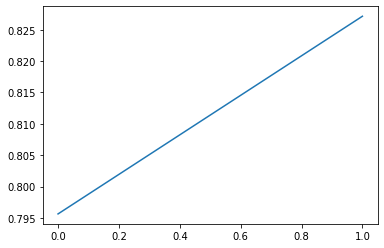

In [61]:
# Plot the metrics
plt.plot(solver_loaded_history['accuracy'])

5. Load model and use for solving puzzles

In [63]:
sudoku_model = keras.models.load_model('./models/sudoku.model')

Part 4 - Testing on some sample sudoku puzzles

We have included 3 sample testcases and their visualizations below

1. sudoku1.jpg (./sudoku_samples/sudoku1.jpg)

path of input file :  ./sudoku_samples/sudoku1.jpg


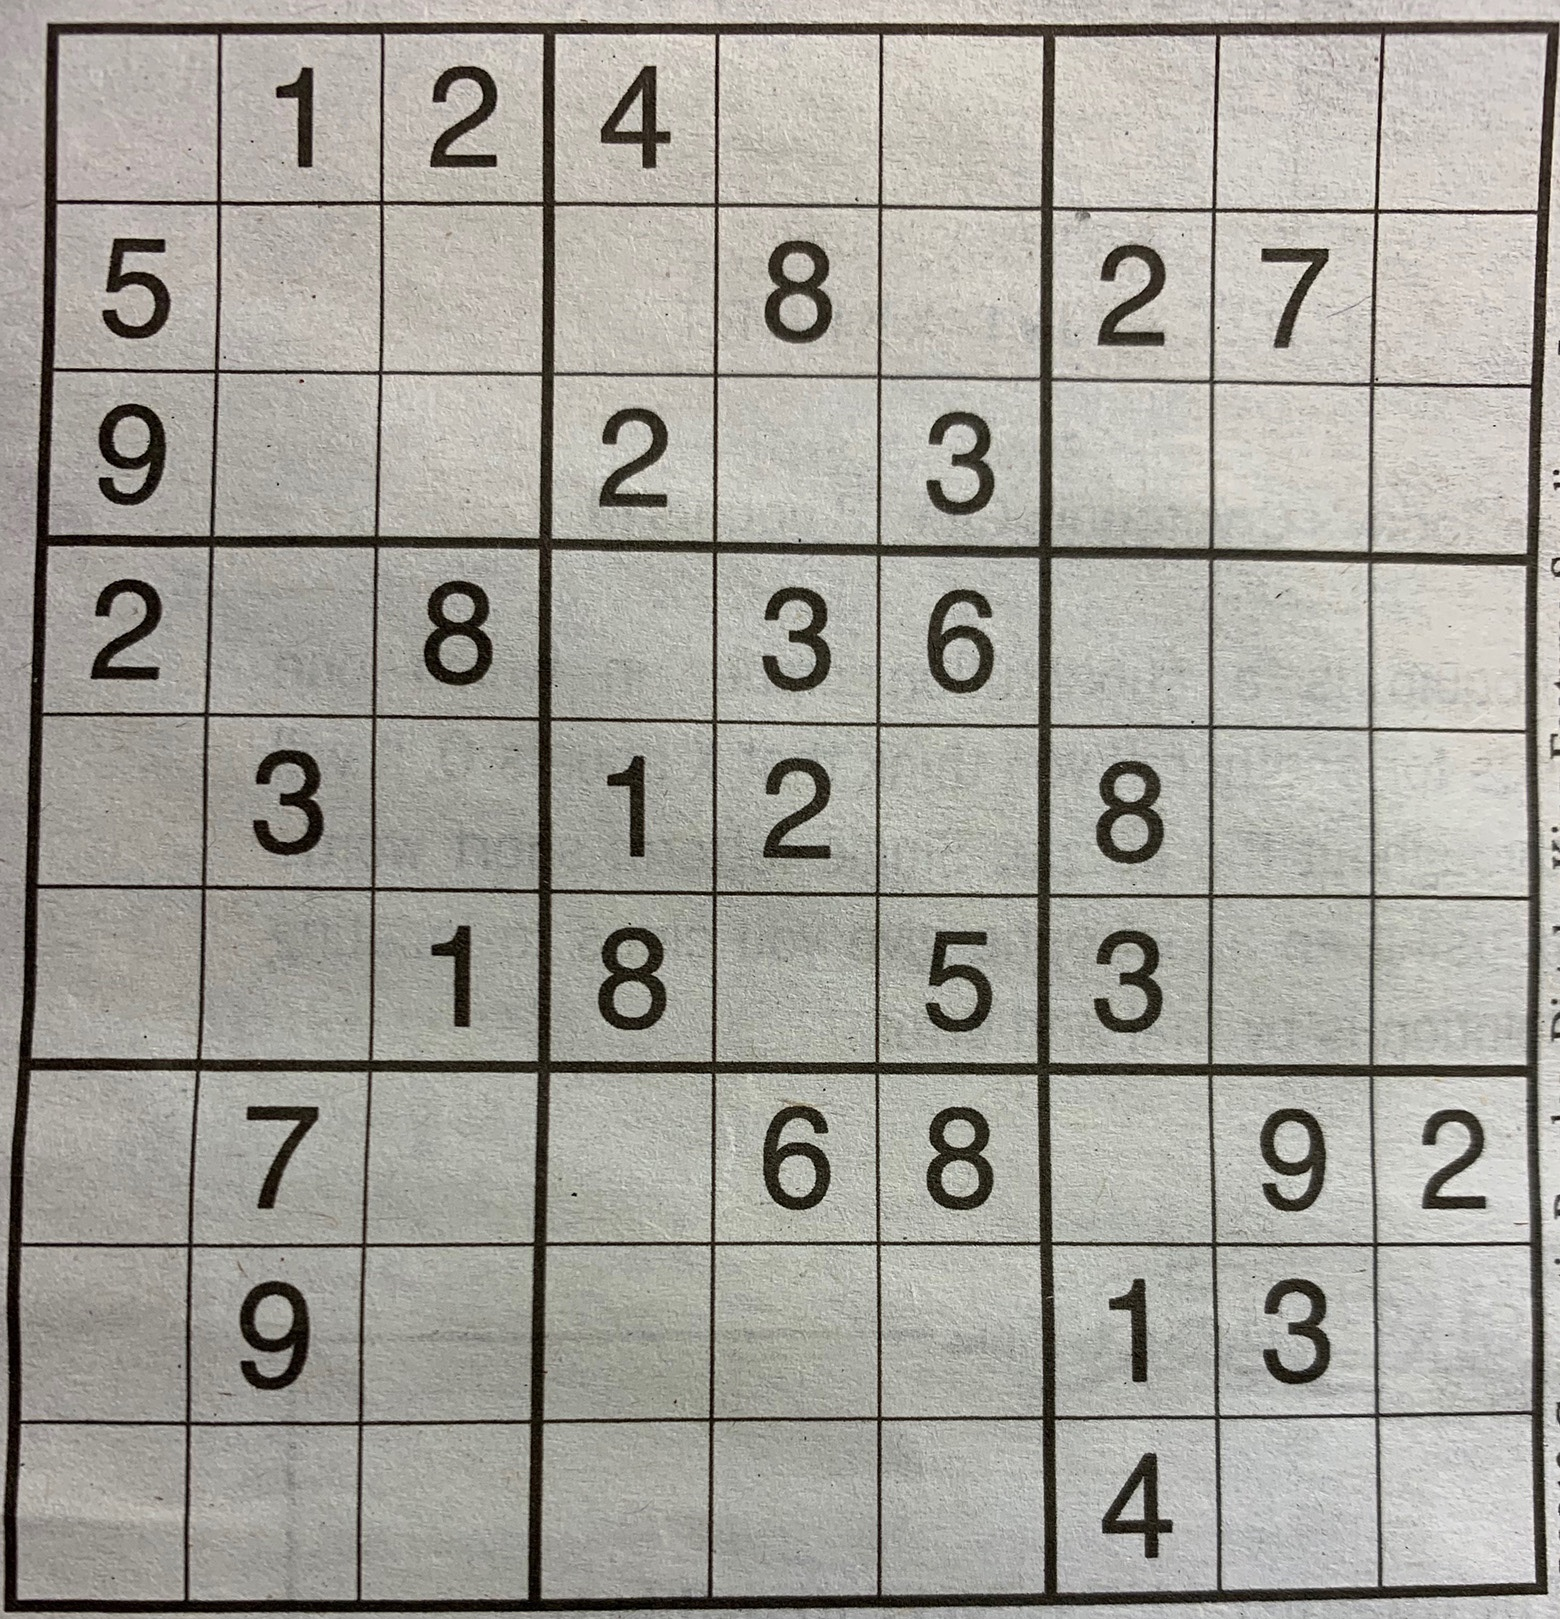

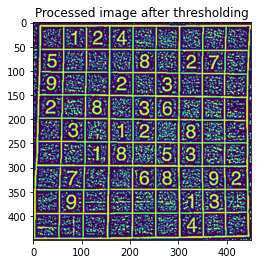

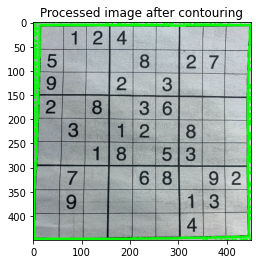

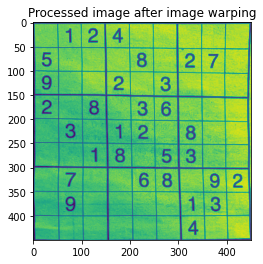

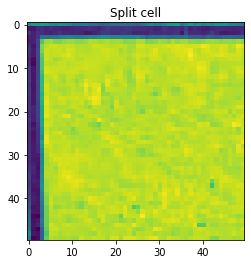

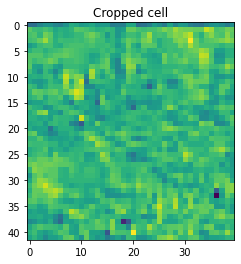

81


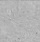

Predicted :  0


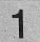

Predicted :  1


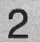

Predicted :  2


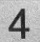

Predicted :  4


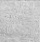

Predicted :  0


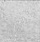

Predicted :  0


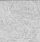

Predicted :  0


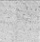

Predicted :  0


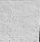

Predicted :  0


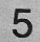

Predicted :  5


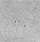

Predicted :  0


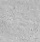

Predicted :  0


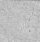

Predicted :  0


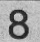

Predicted :  8


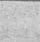

Predicted :  0


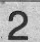

Predicted :  2


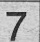

Predicted :  7


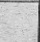

Predicted :  0


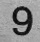

Predicted :  9


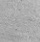

Predicted :  0


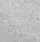

Predicted :  0


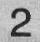

Predicted :  2


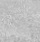

Predicted :  0


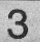

Predicted :  3


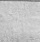

Predicted :  0


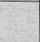

Predicted :  0


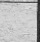

Predicted :  0


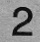

Predicted :  2


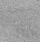

Predicted :  0


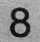

Predicted :  8


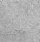

Predicted :  0


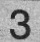

Predicted :  3


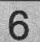

Predicted :  6


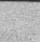

Predicted :  0


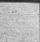

Predicted :  0


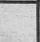

Predicted :  0


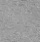

Predicted :  0


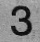

Predicted :  3


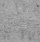

Predicted :  0


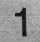

Predicted :  1


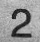

Predicted :  2


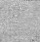

Predicted :  0


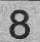

Predicted :  8


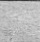

Predicted :  0


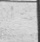

Predicted :  0


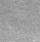

Predicted :  0


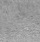

Predicted :  0


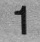

Predicted :  1


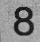

Predicted :  8


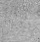

Predicted :  0


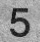

Predicted :  5


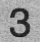

Predicted :  3


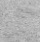

Predicted :  0


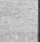

Predicted :  0


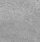

Predicted :  0


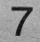

Predicted :  7


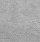

Predicted :  0


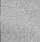

Predicted :  0


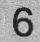

Predicted :  6


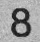

Predicted :  8


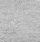

Predicted :  0


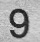

Predicted :  9


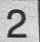

Predicted :  2


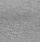

Predicted :  0


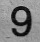

Predicted :  9


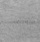

Predicted :  0


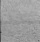

Predicted :  0


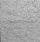

Predicted :  0


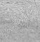

Predicted :  0


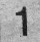

Predicted :  1


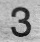

Predicted :  3


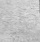

Predicted :  0


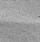

Predicted :  0


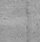

Predicted :  0


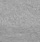

Predicted :  0


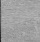

Predicted :  0


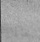

Predicted :  0


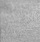

Predicted :  0


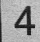

Predicted :  4


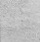

Predicted :  0


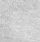

Predicted :  0
0 1 2 4 0 0 0 0 0
5 0 0 0 8 0 2 7 0
9 0 0 2 0 3 0 0 0
2 0 8 0 3 6 0 0 0
0 3 0 1 2 0 8 0 0
0 0 1 8 0 5 3 0 0
0 7 0 0 6 8 0 9 2
0 9 0 0 0 0 1 3 0
0 0 0 0 0 0 4 0 0
 The Sudoku puzzle after digit recognition is :
[[0, 1, 2, 4, 0, 0, 0, 0, 0], [5, 0, 0, 0, 8, 0, 2, 7, 0], [9, 0, 0, 2, 0, 3, 0, 0, 0], [2, 0, 8, 0, 3, 6, 0, 0, 0], [0, 3, 0, 1, 2, 0, 8, 0, 0], [0, 0, 1, 8, 0, 5, 3, 0, 0], [0, 7, 0, 0, 6, 8, 0, 9, 2], [0, 9, 0, 0, 0, 0, 1, 3, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0]]
Solution  is :
[[6 1 2 4 5 7 9 8 3]
 [5 4 3 6 8 9 2 7 1]
 [9 8 7 2 1 3 6 4 5]
 [2 5 8 9 3 6 7 1 4]
 [7 3 9 1 2 4 8 5 6]
 [4 6 1 8 7 5 3 2 9]
 [1 7 4 3 6 8 5 9 2]
 [8 9 6 5 4 2 1 3 7]
 [3 2 5 7 9 1 4 6 8]]
[45 45 45 45 45 45 45 45 45]
Columns are correct !!
[45 45 45 45 45 45 45 45 45]
Rows are correct !!
VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED


In [69]:
file_path = file_path = "./sudoku_samples/sudoku1.jpg"

print("path of input file : " ,file_path)


input_image = cv.imread(file_path)

if (input_image is not None and input_image.size == 0):
     print("Error reading file")

# Show image original
cv2_imshow(input_image)

# Preprocess
cropped_sudoku = take_image_input(input_image)

# delete files if any in cropnum folder
dir = './cropnum'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

# Write cropped images into cropnum
write_images(cropped_sudoku)

# Run predictions
prediction = run_prediction()

grid = make_grid(prediction)
print(" The Sudoku puzzle after digit recognition is :")
print(grid)
game = grid
# print(game)
answer = solve_sudoku(game, sudoku_model=sudoku_model,  sudoku_shape= sudoku_shape)
print('Solution  is :')
print(answer)

# Check whether all columns are correct
final_check_column = np.sum(answer, axis=1)
flag1 = False
flag2 = False
print(final_check_column)
for x in range(len(final_check_column)):
  if(final_check_column[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_column)-1):
    flag1 = True
    print("Columns are correct !!")


final_check_row = np.sum(answer, axis=0)
print(final_check_row)
for x in range(len(final_check_row)):
  if(final_check_row[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_row)-1):
    flag2 = True
    print("Rows are correct !!")


if (flag1 and flag2):
  print("VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED")
else:
  print("Sudoku unsolved")

2. sudoku2.jpeg (./sudoku_samples/sudoku2.jpeg)

path of input file :  ./sudoku_samples/sudoku2.jpeg


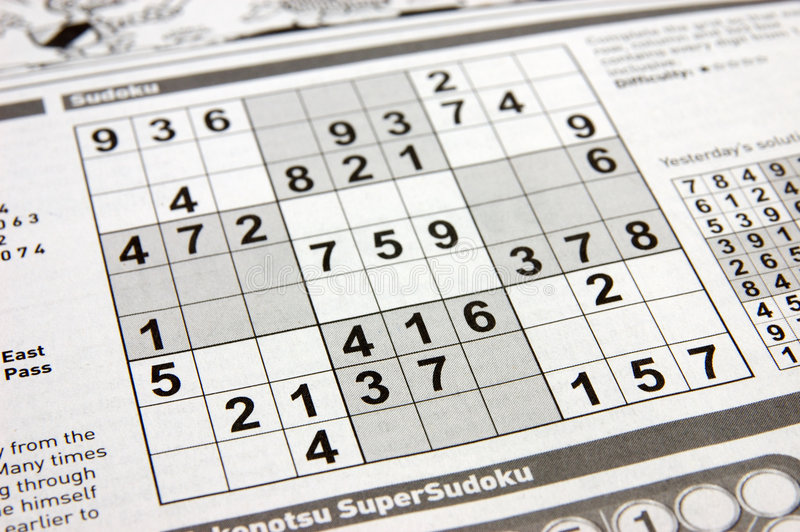

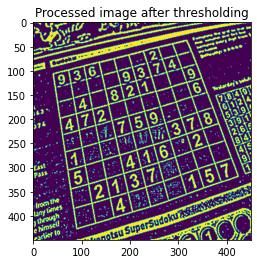

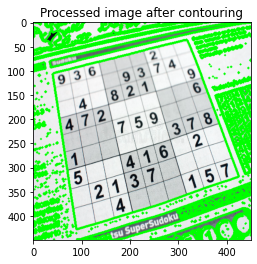

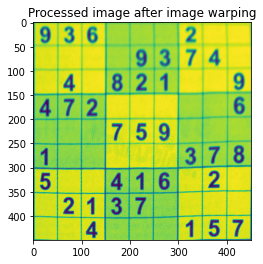

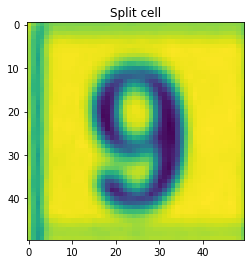

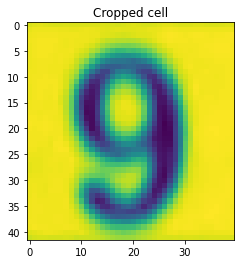

81


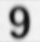

Predicted :  9


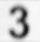

Predicted :  3


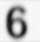

Predicted :  0


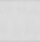

Predicted :  0


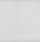

Predicted :  0


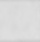

Predicted :  0


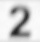

Predicted :  2


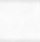

Predicted :  0


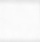

Predicted :  0


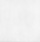

Predicted :  0


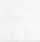

Predicted :  0


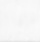

Predicted :  0


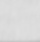

Predicted :  0


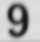

Predicted :  9


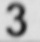

Predicted :  3


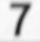

Predicted :  1


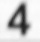

Predicted :  4


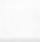

Predicted :  0


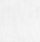

Predicted :  0


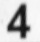

Predicted :  4


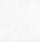

Predicted :  0


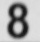

Predicted :  8


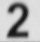

Predicted :  2


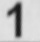

Predicted :  1


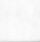

Predicted :  0


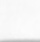

Predicted :  0


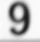

Predicted :  9


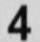

Predicted :  4


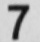

Predicted :  7


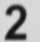

Predicted :  2


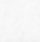

Predicted :  0


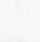

Predicted :  0


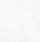

Predicted :  0


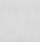

Predicted :  0


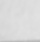

Predicted :  0


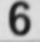

Predicted :  0


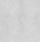

Predicted :  0


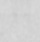

Predicted :  0


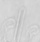

Predicted :  0


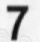

Predicted :  7


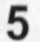

Predicted :  5


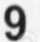

Predicted :  9


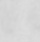

Predicted :  0


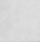

Predicted :  0


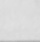

Predicted :  0


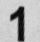

Predicted :  1


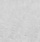

Predicted :  0


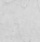

Predicted :  0


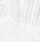

Predicted :  0


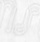

Predicted :  0


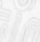

Predicted :  0


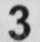

Predicted :  3


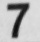

Predicted :  1


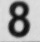

Predicted :  8


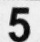

Predicted :  5


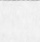

Predicted :  0


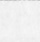

Predicted :  0


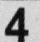

Predicted :  4


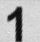

Predicted :  1


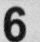

Predicted :  6


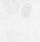

Predicted :  0


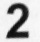

Predicted :  2


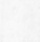

Predicted :  0


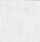

Predicted :  0


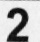

Predicted :  2


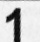

Predicted :  1


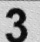

Predicted :  3


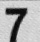

Predicted :  7


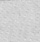

Predicted :  0


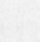

Predicted :  0


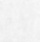

Predicted :  0


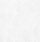

Predicted :  0


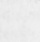

Predicted :  0


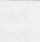

Predicted :  0


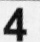

Predicted :  4


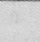

Predicted :  0


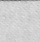

Predicted :  0


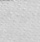

Predicted :  0


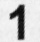

Predicted :  1


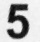

Predicted :  5


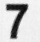

Predicted :  7
9 3 0 0 0 0 2 0 0
0 0 0 0 9 3 1 4 0
0 4 0 8 2 1 0 0 9
4 7 2 0 0 0 0 0 0
0 0 0 7 5 9 0 0 0
1 0 0 0 0 0 3 1 8
5 0 0 4 1 6 0 2 0
0 2 1 3 7 0 0 0 0
0 0 4 0 0 0 1 5 7
 The Sudoku puzzle after digit recognition is :
[[9, 3, 0, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 9, 3, 1, 4, 0], [0, 4, 0, 8, 2, 1, 0, 0, 9], [4, 7, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 7, 5, 9, 0, 0, 0], [1, 0, 0, 0, 0, 0, 3, 1, 8], [5, 0, 0, 4, 1, 6, 0, 2, 0], [0, 2, 1, 3, 7, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 1, 5, 7]]
Solution  is :
[[9 3 5 6 4 7 2 8 1]
 [2 1 8 5 9 3 7 4 6]
 [7 4 6 8 2 1 5 3 9]
 [4 7 2 1 3 8 6 9 5]
 [6 8 3 7 5 9 4 1 2]
 [1 5 9 2 6 4 3 7 8]
 [5 9 7 4 1 6 8 2 3]
 [8 2 1 3 7 5 9 6 4]
 [3 6 4 9 8 2 1 5 7]]
[45 45 45 45 45 45 45 45 45]
Columns are correct !!
[45 45 45 45 45 45 45 45 45]
Rows are correct !!
VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED


In [74]:
file_path = file_path = "./sudoku_samples/sudoku2.jpeg"

print("path of input file : " ,file_path)


input_image = cv.imread(file_path)

if (input_image is not None and input_image.size == 0):
     print("Error reading file")

# Show image original
cv2_imshow(input_image)

# Preprocess
cropped_sudoku = take_image_input(input_image)

# delete files if any in cropnum folder
dir = './cropnum'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

# Write cropped images into cropnum
write_images(cropped_sudoku)

# Run predictions
prediction = run_prediction()

grid = make_grid(prediction)
print(" The Sudoku puzzle after digit recognition is :")
print(grid)
game = grid
# print(game)
answer = solve_sudoku(game, sudoku_model=sudoku_model,  sudoku_shape= sudoku_shape)
print('Solution  is :')
print(answer)

# Check whether all columns are correct
final_check_column = np.sum(answer, axis=1)
flag1 = False
flag2 = False
print(final_check_column)
for x in range(len(final_check_column)):
  if(final_check_column[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_column)-1):
    flag1 = True
    print("Columns are correct !!")


final_check_row = np.sum(answer, axis=0)
print(final_check_row)
for x in range(len(final_check_row)):
  if(final_check_row[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_row)-1):
    flag2 = True
    print("Rows are correct !!")


if (flag1 and flag2):
  print("VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED")
else:
  print("Sudoku unsolved")

3. sudoku3.png (./sudoku_samples/sudoku2.png)

path of input file :  ./sudoku_samples/sudoku3.png


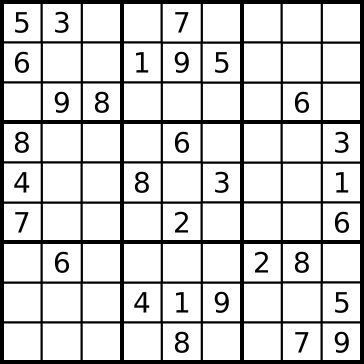

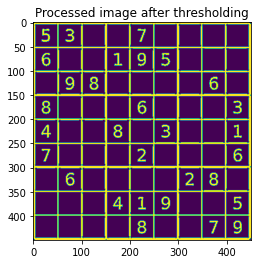

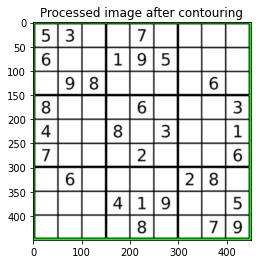

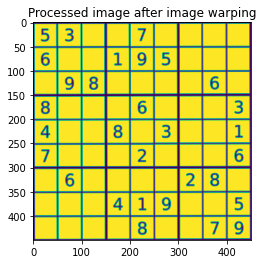

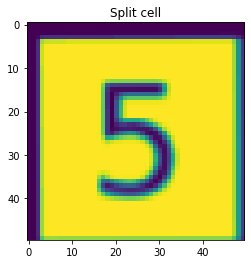

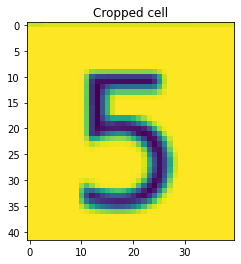

81


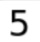

Predicted :  5


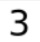

Predicted :  3


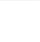

Predicted :  0


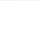

Predicted :  0


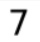

Predicted :  7


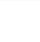

Predicted :  0


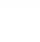

Predicted :  0


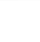

Predicted :  0


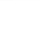

Predicted :  0


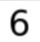

Predicted :  6


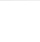

Predicted :  0


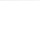

Predicted :  0


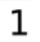

Predicted :  1


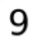

Predicted :  9


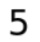

Predicted :  5


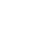

Predicted :  0


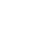

Predicted :  0


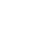

Predicted :  0


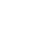

Predicted :  0


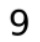

Predicted :  9


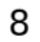

Predicted :  8


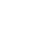

Predicted :  0


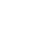

Predicted :  0


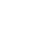

Predicted :  0


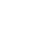

Predicted :  0


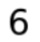

Predicted :  6


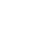

Predicted :  0


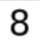

Predicted :  8


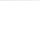

Predicted :  0


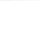

Predicted :  0


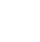

Predicted :  0


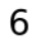

Predicted :  6


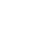

Predicted :  0


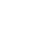

Predicted :  0


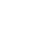

Predicted :  0


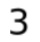

Predicted :  3


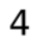

Predicted :  4


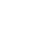

Predicted :  0


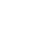

Predicted :  0


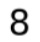

Predicted :  8


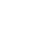

Predicted :  0


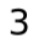

Predicted :  3


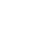

Predicted :  0


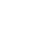

Predicted :  0


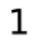

Predicted :  1


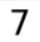

Predicted :  7


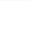

Predicted :  0


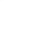

Predicted :  0


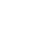

Predicted :  0


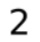

Predicted :  2


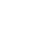

Predicted :  0


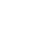

Predicted :  0


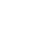

Predicted :  0


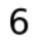

Predicted :  6


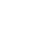

Predicted :  0


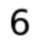

Predicted :  6


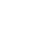

Predicted :  0


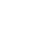

Predicted :  0


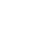

Predicted :  0


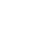

Predicted :  0


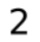

Predicted :  2


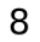

Predicted :  8


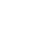

Predicted :  0


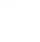

Predicted :  0


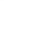

Predicted :  0


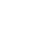

Predicted :  0


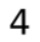

Predicted :  4


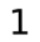

Predicted :  1


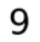

Predicted :  9


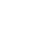

Predicted :  0


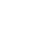

Predicted :  0


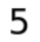

Predicted :  5


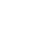

Predicted :  0


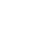

Predicted :  0


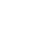

Predicted :  0


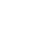

Predicted :  0


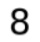

Predicted :  8


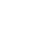

Predicted :  0


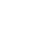

Predicted :  0


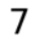

Predicted :  7


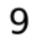

Predicted :  9
5 3 0 0 7 0 0 0 0
6 0 0 1 9 5 0 0 0
0 9 8 0 0 0 0 6 0
8 0 0 0 6 0 0 0 3
4 0 0 8 0 3 0 0 1
7 0 0 0 2 0 0 0 6
0 6 0 0 0 0 2 8 0
0 0 0 4 1 9 0 0 5
0 0 0 0 8 0 0 7 9
 The Sudoku puzzle after digit recognition is :
[[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]]
Solution  is :
[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]
[45 45 45 45 45 45 45 45 45]
Columns are correct !!
[45 45 45 45 45 45 45 45 45]
Rows are correct !!
VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED


In [75]:
file_path = file_path = "./sudoku_samples/sudoku3.png"

print("path of input file : " ,file_path)


input_image = cv.imread(file_path)

if (input_image is not None and input_image.size == 0):
     print("Error reading file")

# Show image original
cv2_imshow(input_image)

# Preprocess
cropped_sudoku = take_image_input(input_image)

# delete files if any in cropnum folder
dir = './cropnum'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

# Write cropped images into cropnum
write_images(cropped_sudoku)

# Run predictions
prediction = run_prediction()

grid = make_grid(prediction)
print(" The Sudoku puzzle after digit recognition is :")
print(grid)
game = grid
# print(game)
answer = solve_sudoku(game, sudoku_model=sudoku_model,  sudoku_shape= sudoku_shape)
print('Solution  is :')
print(answer)

# Check whether all columns are correct
final_check_column = np.sum(answer, axis=1)
flag1 = False
flag2 = False
print(final_check_column)
for x in range(len(final_check_column)):
  if(final_check_column[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_column)-1):
    flag1 = True
    print("Columns are correct !!")


final_check_row = np.sum(answer, axis=0)
print(final_check_row)
for x in range(len(final_check_row)):
  if(final_check_row[x] != 45):
    print("Wrong Output")
    break;
  if(x == len(final_check_row)-1):
    flag2 = True
    print("Rows are correct !!")


if (flag1 and flag2):
  print("VUHOOOOOO! SODOKU SOLVED AT LIGHTENING SPEED")
else:
  print("Sudoku unsolved")